In [1]:
#https://github.com/decanbay/YOLOv3-Calculate-Anchor-Boxes/blob/master/YOLOv3_get_anchors.py
import json
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv2
#import seaborn as sns; sns.set()  # for plot styling
from PIL import Image

In [2]:
imgw = []
imgh = []
img_path = 'LASIESTA/colFram'
for root, dirs, files in os.walk(img_path, topdown=True):
    for name in files:
        path = os.path.join(root, name)
        img = cv2.imread(path)
        wi, he, c = img.shape
       
        imgw.append(wi)
        imgh.append(he)


In [3]:
w, h = [], []
c = 0
label_path = 'LASIESTA/colFram_labels_safe2'
for root, dirs, files in os.walk(label_path, topdown=True):
    for name in files:
        path = os.path.join(root, name)
        file = open(path)
        lines = file.readlines()
        for l in lines:
            l = str(l)
            l = l.split()
            #w.append(math.floor(float(l[3]) * imgw[c]))
            #h.append(math.floor(float(l[4]) * imgh[c]))
            w.append(float(l[3]))
            h.append(float(l[4]))
        c += 1
print(len(w))
print(len(h))

4531
4531


In [4]:
w=np.asarray(w)
h=np.asarray(h)

In [5]:
x=[w,h]
x=np.asarray(x)
x=x.transpose()

In [6]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=9)
kmeans3.fit(x)
y_kmeans3 = kmeans3.predict(x)

In [7]:
centers3 = kmeans3.cluster_centers_

yolo_anchor_average=[]
for ind in range (9):
    yolo_anchor_average.append(np.mean(x[y_kmeans3==ind],axis=0))

In [8]:
yolo_anchor_average=np.array(yolo_anchor_average)

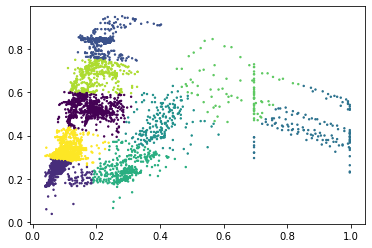

In [9]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=2, cmap='viridis')

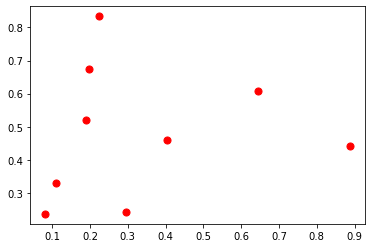

In [10]:
plt.scatter(yolo_anchor_average[:, 0], yolo_anchor_average[:, 1], c='red', s=50);

In [11]:
yoloV3anchors = yolo_anchor_average

In [12]:
for a in yoloV3anchors:
    print(a)

[0.19000103 0.51932362]
[0.08220793 0.23668769]
[0.22481819 0.83388581]
[0.88733165 0.44052469]
[0.40489804 0.45859375]
[0.29553757 0.24137899]
[0.64346307 0.60929167]
[0.19747823 0.67427885]
[0.11071582 0.33070437]
